# Data read

In [29]:
import numpy as np 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
all_data = pd.read_csv('Data.csv')
all_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


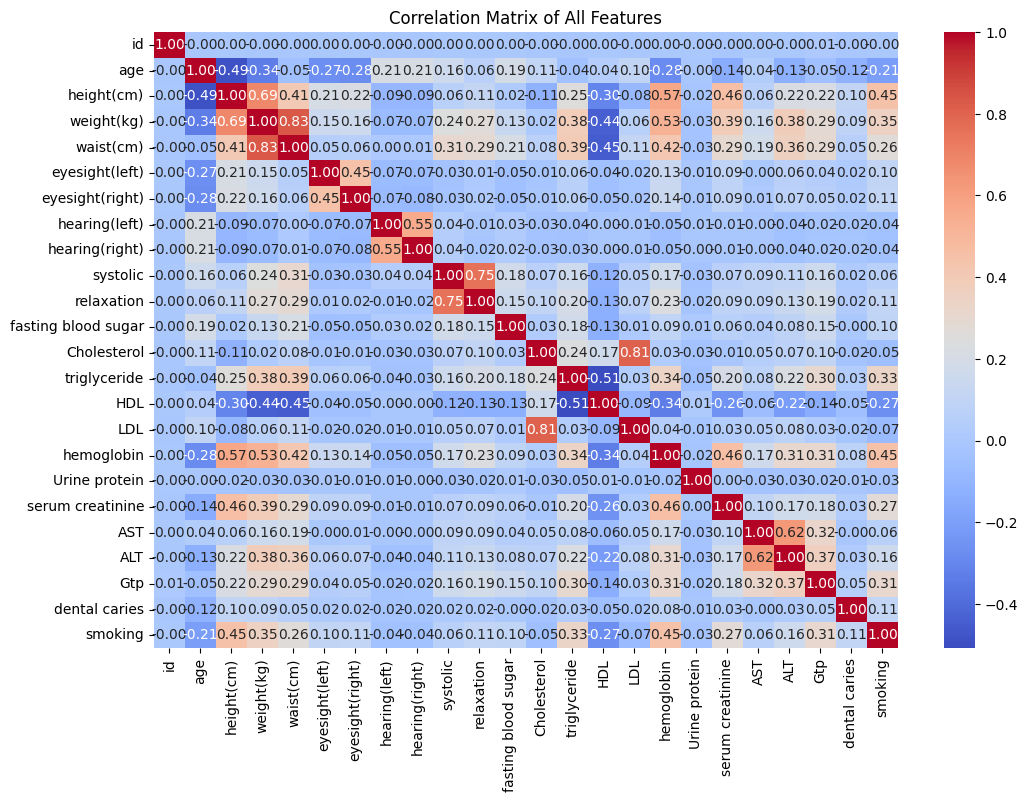

In [31]:
correlation_matrix = all_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

In [32]:
selected_columns = all_data[['hemoglobin', 'height(cm)', 'triglyceride']]
selected_columns.head()

,hemoglobin,height(cm),triglyceride
0,16.5,165,300
1,16.2,165,55
2,17.4,170,197
3,15.9,180,203
4,15.4,165,87


In [33]:
data = pd.read_csv('your_data.csv')
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking
0,0,40,87,1,1,75,0,1,60,0.6,81.0,1
1,1,57,83,1,2,126,1,2,65,0.7,89.0,0
2,2,45,75,1,1,93,0,1,75,0.5,81.0,1
3,3,38,88,1,1,102,1,1,95,1.2,105.0,0
4,4,44,76,1,1,93,0,1,60,1.0,80.5,1


In [34]:
data = pd.concat([data, selected_columns], axis=1)
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
0,0,40,87,1,1,75,0,1,60,0.6,81.0,1,16.5,165,300
1,1,57,83,1,2,126,1,2,65,0.7,89.0,0,16.2,165,55
2,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197
3,3,38,88,1,1,102,1,1,95,1.2,105.0,0,15.9,180,203
4,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               159256 non-null  int64  
 1   HDL              159256 non-null  int64  
 2   relaxation       159256 non-null  int64  
 3   Urine protein    159256 non-null  int64  
 4   hearing(right)   159256 non-null  int64  
 5   LDL              159256 non-null  int64  
 6   dental caries    159256 non-null  int64  
 7   hearing(left)    159256 non-null  int64  
 8   weight(kg)       159256 non-null  int64  
 9   eyesight(right)  159256 non-null  float64
 10  waist(cm)        159256 non-null  float64
 11  smoking          159256 non-null  int64  
 12  hemoglobin       159256 non-null  float64
 13  height(cm)       159256 non-null  int64  
 14  triglyceride     159256 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 18.2 MB


In [36]:
data.isna().sum()

id                 0
HDL                0
relaxation         0
Urine protein      0
hearing(right)     0
LDL                0
dental caries      0
hearing(left)      0
weight(kg)         0
eyesight(right)    0
waist(cm)          0
smoking            0
hemoglobin         0
height(cm)         0
triglyceride       0
dtype: int64

In [37]:
data.duplicated().sum()

0

In [38]:
data.describe()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,55.852684,76.874071,1.074233,1.023421,114.607682,0.197996,1.023974,67.143662,1.000989,83.001990,0.437365,14.796965,165.266929,127.616046
std,45973.391572,13.964141,8.994642,0.347856,0.151238,28.158931,0.398490,0.152969,12.586198,0.392299,8.957937,0.496063,1.431213,8.818970,66.188989
min,0.000000,9.000000,44.000000,1.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.100000,51.000000,0.000000,4.900000,135.000000,8.000000
25%,39813.750000,45.000000,70.000000,1.000000,1.000000,95.000000,0.000000,1.000000,60.000000,0.800000,77.000000,0.000000,13.800000,160.000000,77.000000
50%,79627.500000,54.000000,78.000000,1.000000,1.000000,114.000000,0.000000,1.000000,65.000000,1.000000,83.000000,0.000000,15.000000,165.000000,115.000000
75%,119441.250000,64.000000,82.000000,1.000000,1.000000,133.000000,0.000000,1.000000,75.000000,1.200000,89.000000,1.000000,15.800000,170.000000,165.000000
max,159255.000000,136.000000,133.000000,6.000000,2.000000,1860.000000,1.000000,2.000000,130.000000,9.900000,127.000000,1.000000,21.000000,190.000000,766.000000


In [39]:
numerical_columns = data.columns
numerical_columns = numerical_columns[numerical_columns != 'id']  # Exclude 'id'
for column in numerical_columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")

Value counts for HDL:
HDL
47     5431
46     5200
44     4983
48     4968
49     4939
       ... 
18        1
9         1
123       1
118       1
22        1
Name: count, Length: 108, dtype: int64


Value counts for relaxation:
relaxation
80     20326
70     16878
78     10258
74      5924
72      5875
       ...  
44         2
121        1
133        1
122        1
47         1
Name: count, Length: 75, dtype: int64


Value counts for Urine protein:
Urine protein
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: count, dtype: int64


Value counts for hearing(right):
hearing(right)
1    155526
2      3730
Name: count, dtype: int64


Value counts for LDL:
LDL
112    2515
106    2495
121    2360
116    2341
107    2304
       ... 
790       1
292       1
226       1
23        1
15        1
Name: count, Length: 222, dtype: int64


Value counts for dental caries:
dental caries
0    127724
1     31532
Name: count, dtype: int64


Value counts for hearing(left):
hea

# Nsheel el Outliers

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column
for column in numerical_columns:
    data = remove_outliers_iqr(data, column)

data.reset_index(drop=True, inplace=True)
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
0,0,40,87,1,1,75,0,1,60,0.6,81.0,1,16.5,165,300
1,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197
2,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87
3,6,69,88,1,1,122,0,1,55,1.2,69.0,0,13.0,160,153
4,8,59,80,1,1,150,0,1,70,1.0,89.0,1,15.7,165,163


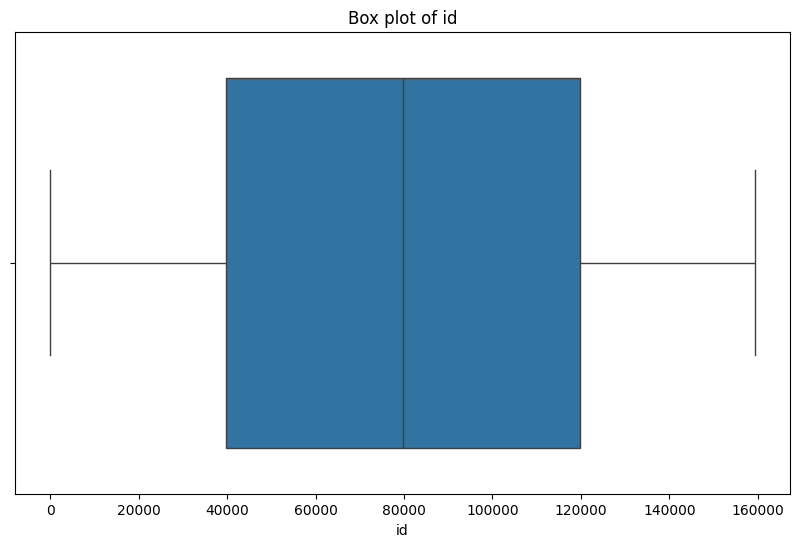

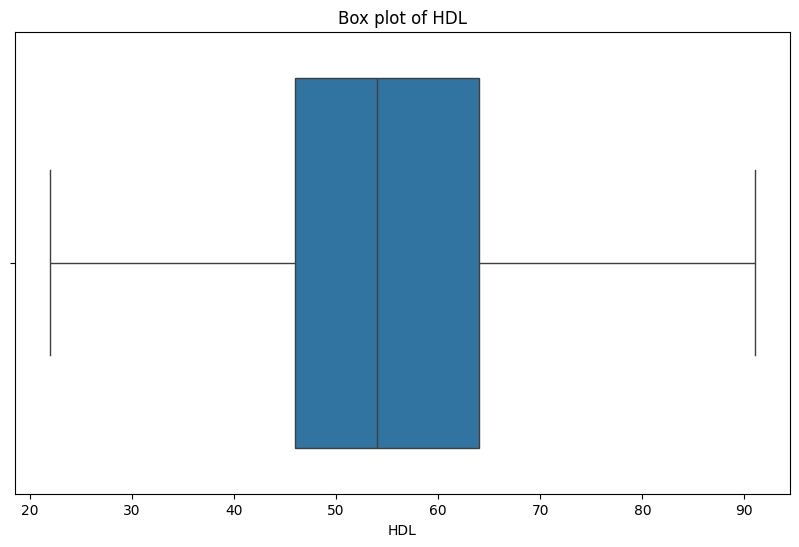

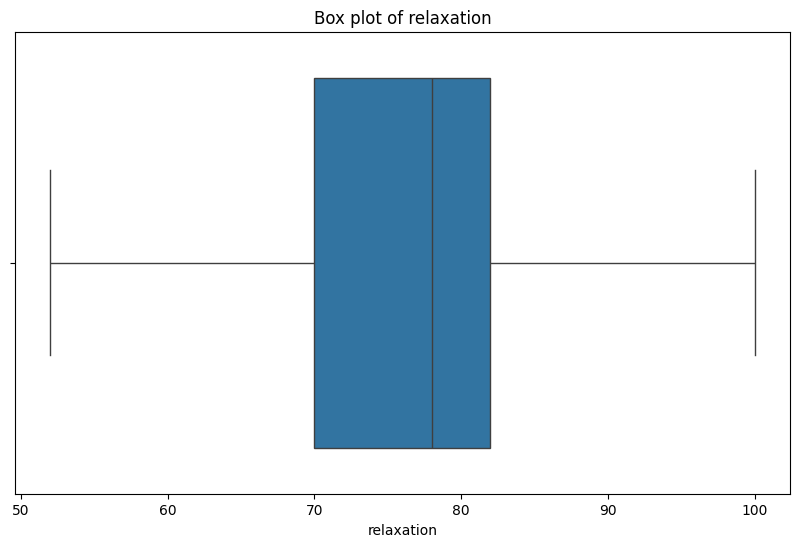

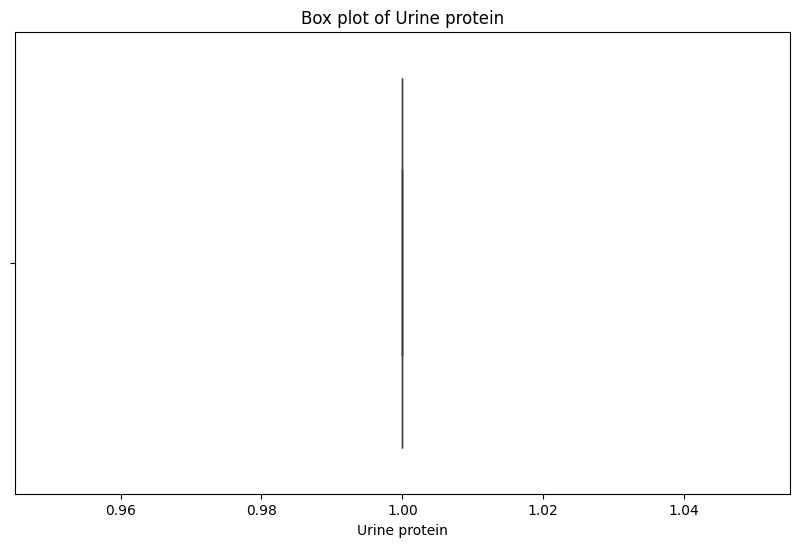

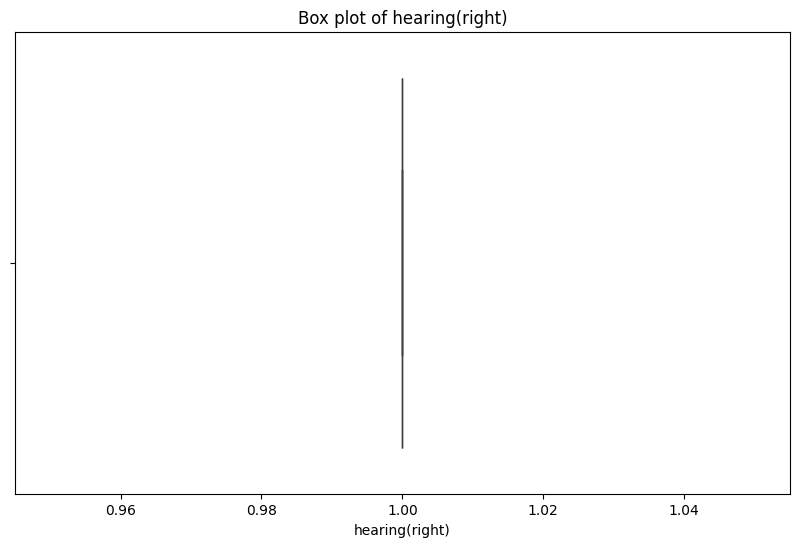

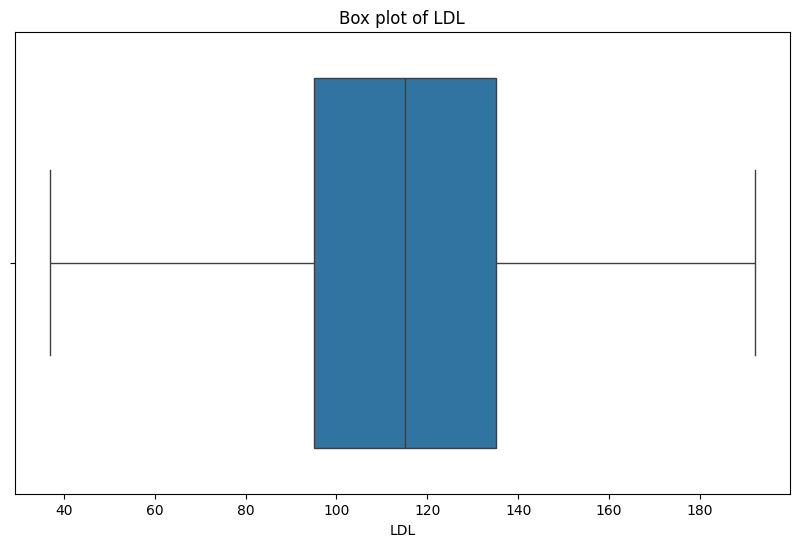

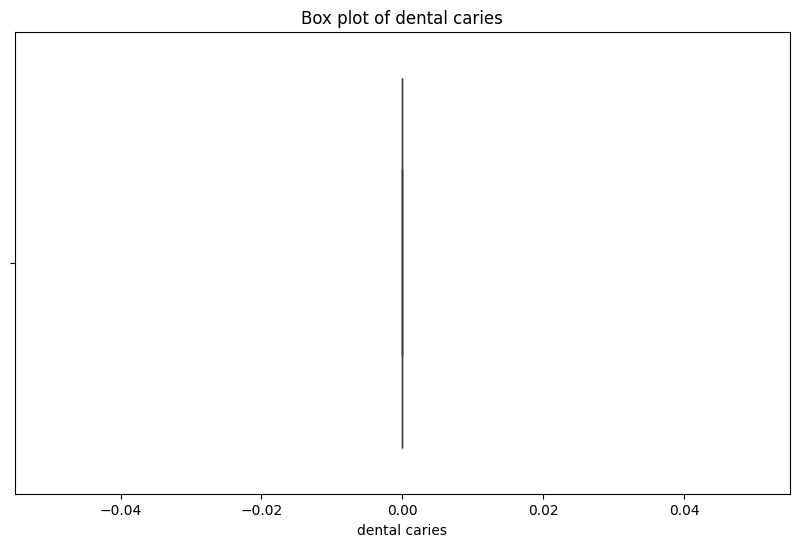

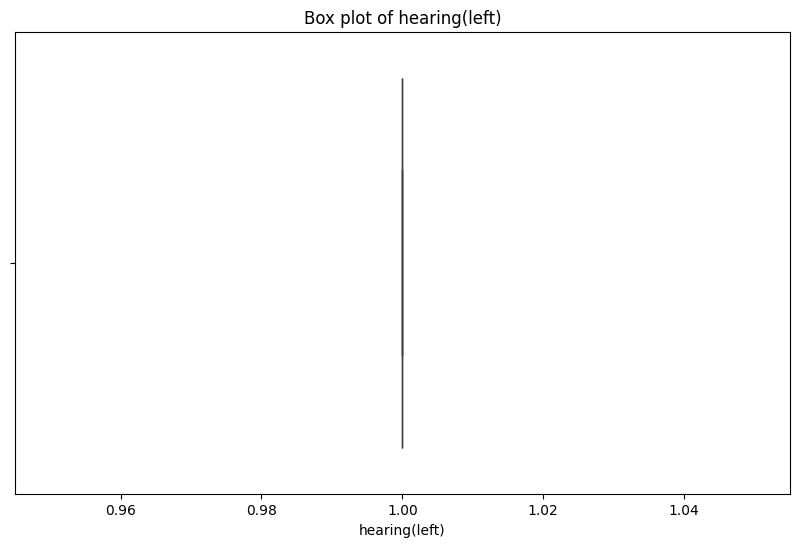

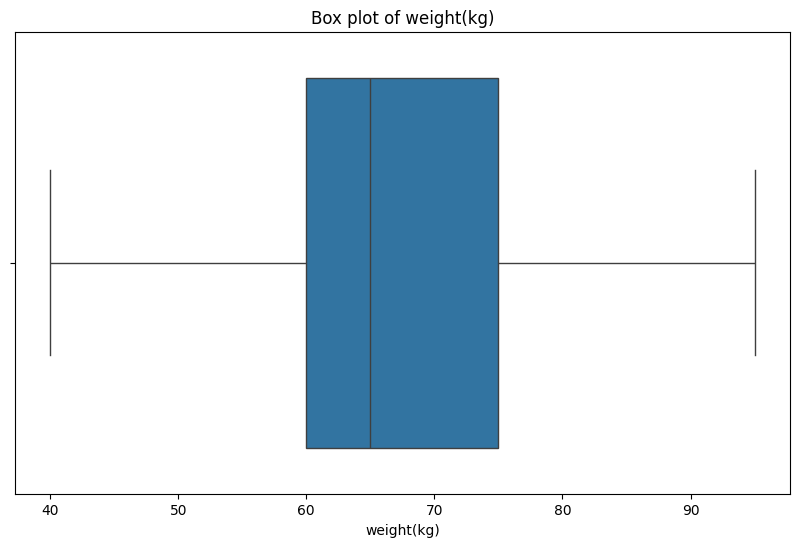

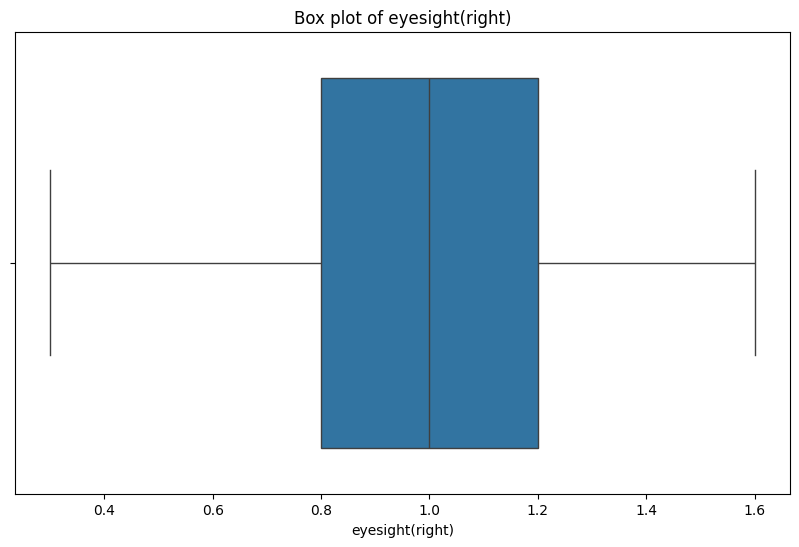

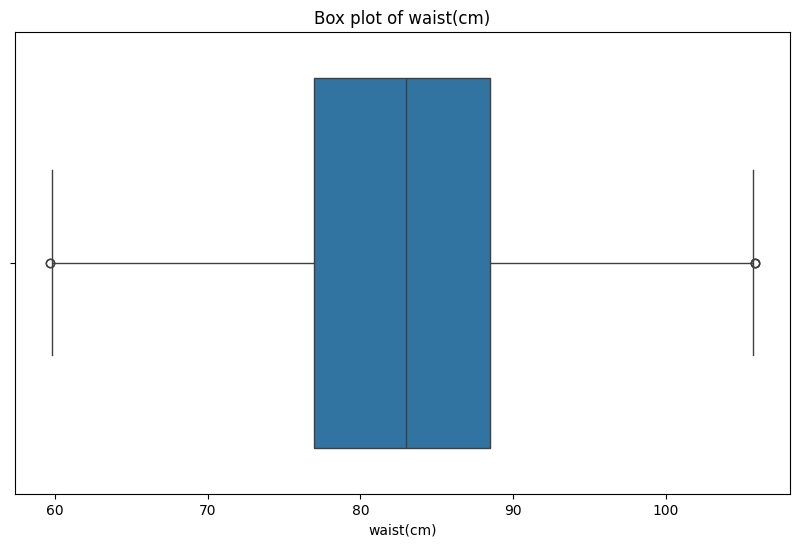

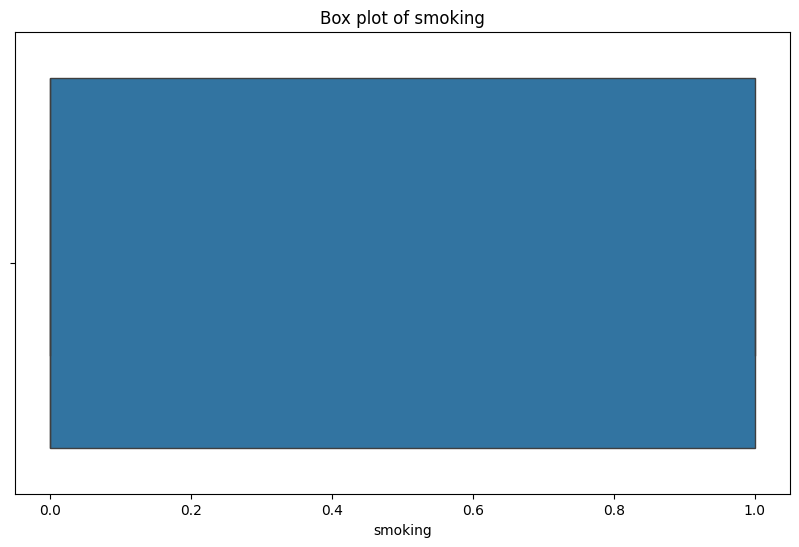

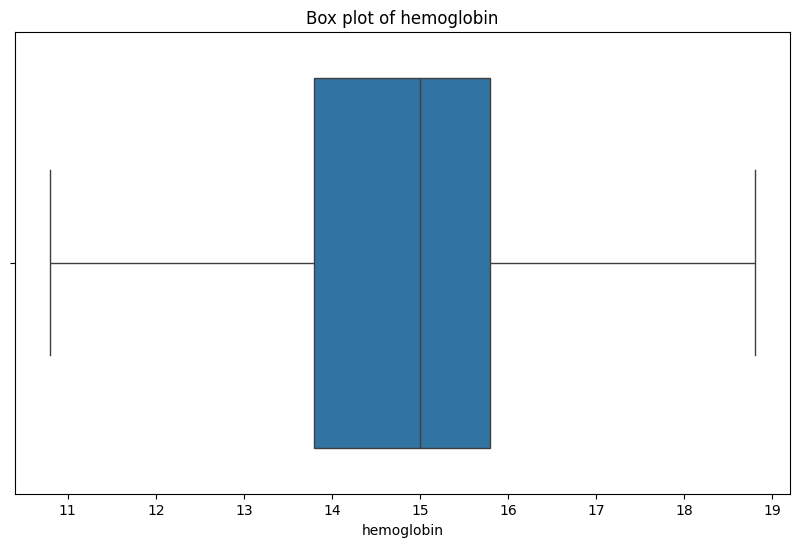

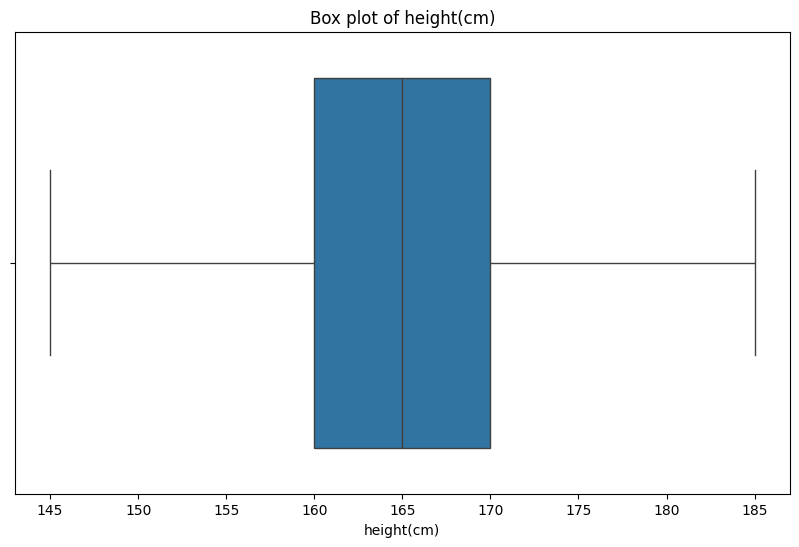

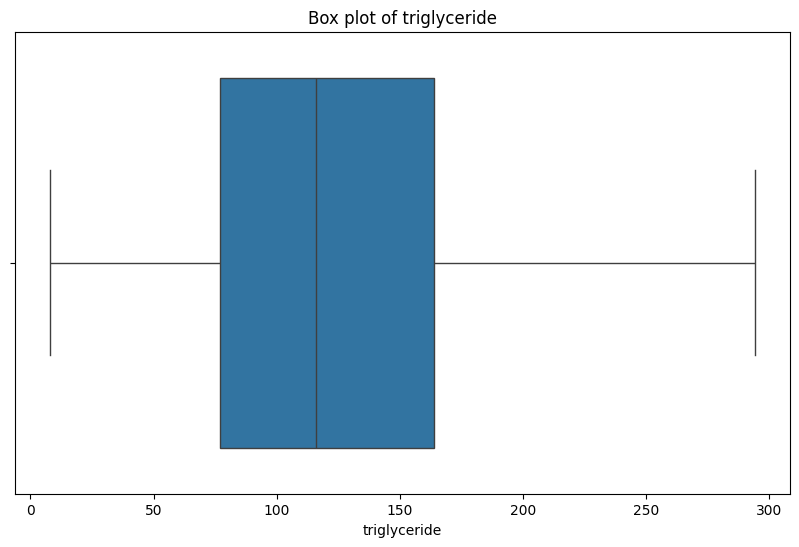

In [ ]:
# Apply the IQR outlier removal function to all columns
for column in data.columns:
    data = remove_outliers_iqr(data, column)

# Function to plot box plots for each column
def plot_box_plots(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.show()

# Plot box plots for each column in the data
plot_box_plots(data)

In [ ]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numerical column and print the number of rows before and after removing outliers
for column in numerical_columns:
    print(f"Number of rows before removing outliers in {column}: {data.shape[0]}")
    data = remove_outliers_iqr(data, column)
    print(f"Number of rows after removing outliers in {column}: {data.shape[0]}")

data.reset_index(drop=True, inplace=True)
data.head()

Number of rows before removing outliers in HDL: 106289
Number of rows after removing outliers in HDL: 106289
Number of rows before removing outliers in relaxation: 106289
Number of rows after removing outliers in relaxation: 106289
Number of rows before removing outliers in Urine protein: 106289
Number of rows after removing outliers in Urine protein: 106289
Number of rows before removing outliers in hearing(right): 106289
Number of rows after removing outliers in hearing(right): 106289
Number of rows before removing outliers in LDL: 106289
Number of rows after removing outliers in LDL: 106289
Number of rows before removing outliers in dental caries: 106289
Number of rows after removing outliers in dental caries: 106289
Number of rows before removing outliers in hearing(left): 106289
Number of rows after removing outliers in hearing(left): 106289
Number of rows before removing outliers in weight(kg): 106289
Number of rows after removing outliers in weight(kg): 106289
Number of rows bef

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride
0,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197
1,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87
2,6,69,88,1,1,122,0,1,55,1.2,69.0,0,13.0,160,153
3,8,59,80,1,1,150,0,1,70,1.0,89.0,1,15.7,165,163
4,9,55,70,1,1,122,0,1,50,1.5,73.0,0,13.2,155,27


# Feature engineering

In [40]:
# Create a new feature 'Cholesterol_Ratio' based on 'HDL' and 'LDL'
data['Cholesterol_Ratio'] = data['HDL'] / data['LDL']

data['Height_to_Waist_Ratio'] = data['height(cm)'] / data['waist(cm)']

# Create a new feature 'Hemoglobin_Level' based on 'hemoglobin'
data['Hemoglobin_Level'] = pd.cut(data['hemoglobin'], bins=[0, 12, 16, np.inf], labels=False)

# Create a new feature 'BMI' (Body Mass Index) based on 'weight(kg)' and 'waist(cm)'
data['BMI'] = data['weight(kg)'] / (data['waist(cm)'] / 100) ** 2

In [41]:
data.head()

,id,HDL,relaxation,Urine protein,hearing(right),LDL,dental caries,hearing(left),weight(kg),eyesight(right),waist(cm),smoking,hemoglobin,height(cm),triglyceride,Cholesterol_Ratio,Height_to_Waist_Ratio,Hemoglobin_Level,BMI
0,0,40,87,1,1,75,0,1,60,0.6,81.0,1,16.5,165,300,0.533333,2.037037,2,91.449474
1,1,57,83,1,2,126,1,2,65,0.7,89.0,0,16.2,165,55,0.452381,1.853933,2,82.060346
2,2,45,75,1,1,93,0,1,75,0.5,81.0,1,17.4,170,197,0.483871,2.098765,2,114.311843
3,3,38,88,1,1,102,1,1,95,1.2,105.0,0,15.9,180,203,0.372549,1.714286,1,86.167800
4,4,44,76,1,1,93,0,1,60,1.0,80.5,1,15.4,165,87,0.473118,2.049689,1,92.589020


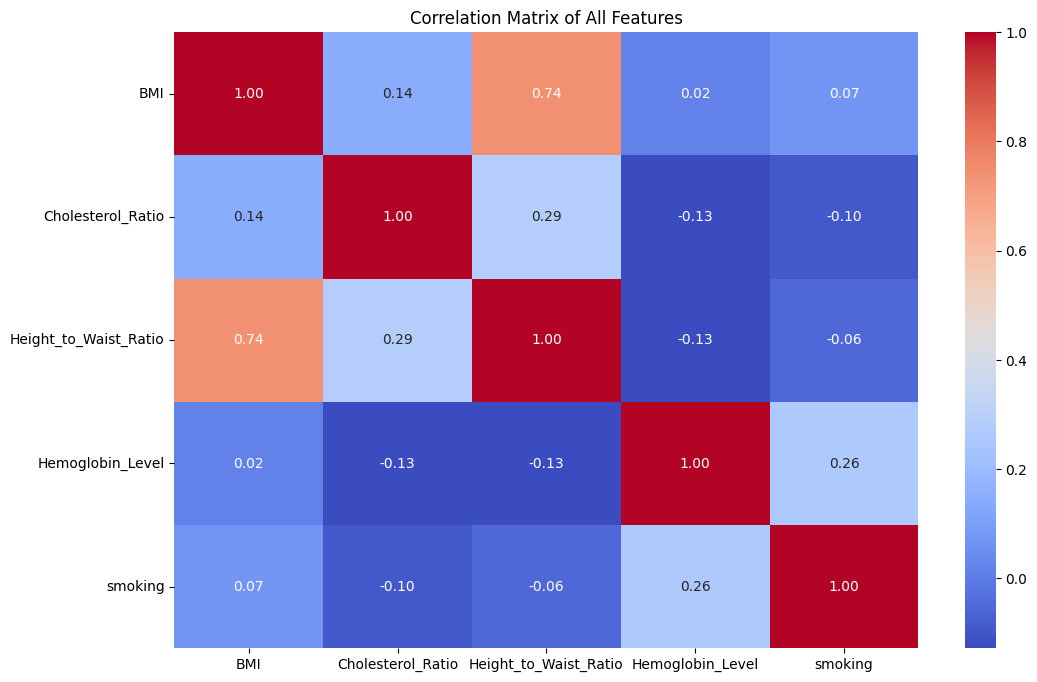

In [42]:
correlation_matrix = data[['BMI','Cholesterol_Ratio','Height_to_Waist_Ratio','Hemoglobin_Level','smoking']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features")
plt.show()

Correlation Matrix:
                             id       HDL  relaxation  Urine protein  \
id                     1.000000  0.003049    0.000119      -0.000900   
HDL                    0.003049  1.000000   -0.127218       0.011221   
relaxation             0.000119 -0.127218    1.000000      -0.020445   
Urine protein         -0.000900  0.011221   -0.020445       1.000000   
hearing(right)        -0.003448 -0.003311   -0.015248      -0.004164   
LDL                   -0.003059 -0.090845    0.073838      -0.014978   
dental caries         -0.001382 -0.049628    0.023915      -0.012761   
hearing(left)         -0.003876 -0.004135   -0.011739      -0.007248   
weight(kg)            -0.001656 -0.438224    0.265921      -0.028537   
eyesight(right)        0.001222 -0.047384    0.017073      -0.011213   
waist(cm)             -0.003491 -0.449219    0.291389      -0.029491   
smoking               -0.000632 -0.271186    0.109501      -0.028548   
hemoglobin             0.000834 -0.335217   

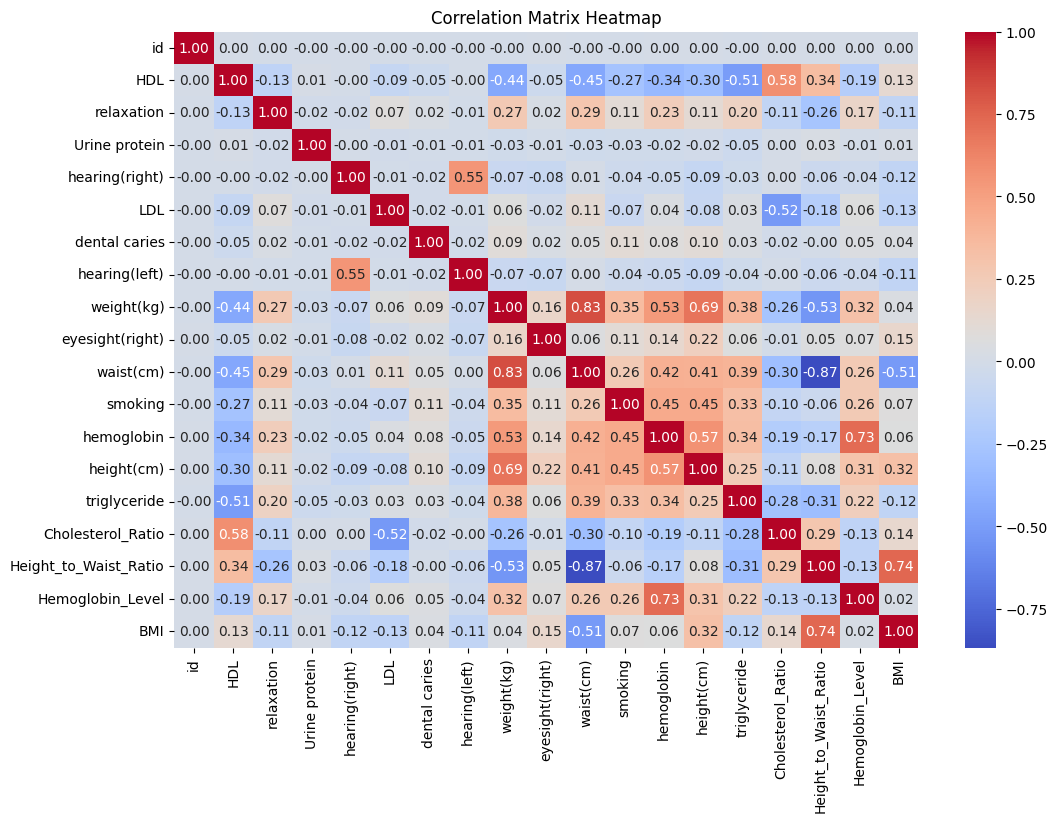

Top 5 features most correlated with 'smoking':
hemoglobin      0.450679
height(cm)      0.447111
weight(kg)      0.351748
triglyceride    0.331975
waist(cm)       0.262715
Name: smoking, dtype: float64


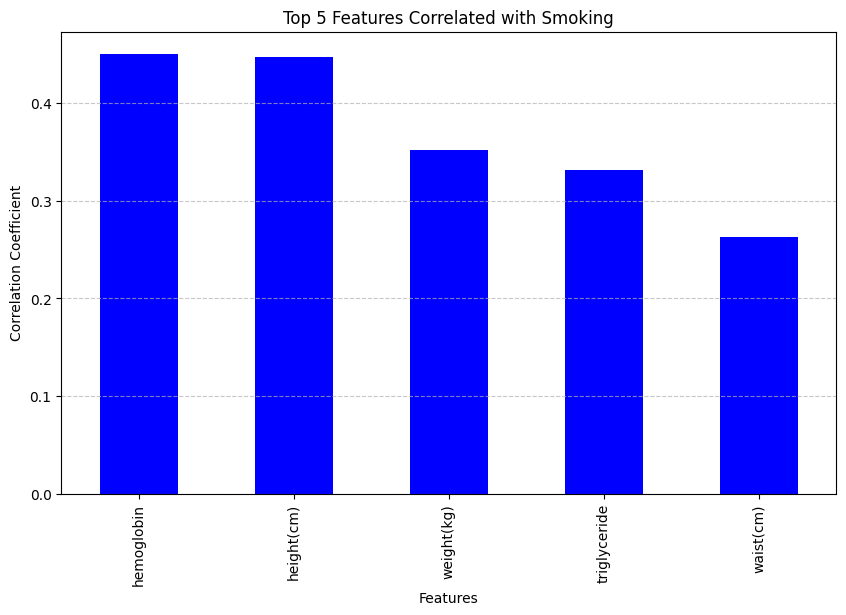

In [43]:
# Correlation Analysis

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Identify the top 5 features that are most correlated with the target variable 'smoking'
correlation_with_target = correlation_matrix['smoking'].drop('smoking').sort_values(ascending=False)
top_5_correlated_features = correlation_with_target.head(5)

# Display the top 5 correlated features
print("Top 5 features most correlated with 'smoking':")
print(top_5_correlated_features)

# Plot the correlation of the top 5 features with the target variable 'smoking'
plt.figure(figsize=(10, 6))
top_5_correlated_features.plot(kind='bar', color='blue')
plt.title('Top 5 Features Correlated with Smoking')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
# Preprocess the data
# Assuming 'smoking' is the target variable and the rest are features
X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables if any
X = pd.get_dummies(X)



In [45]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [46]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [48]:
# Fit the model on the training data
logistic_model.fit(X_train, y_train)


C:\Users\mazen\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [49]:
# Predict on the validation data
y_valid_pred_logistic = logistic_model.predict(X_valid)


In [50]:
# Print classification report
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_valid, y_valid_pred_logistic))

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76     13359
           1       0.69      0.71      0.70     10529

    accuracy                           0.73     23888
   macro avg       0.73      0.73      0.73     23888
weighted avg       0.73      0.73      0.73     23888



Confusion Matrix for Logistic Regression Model:
[[10011  3348]
 [ 3085  7444]]


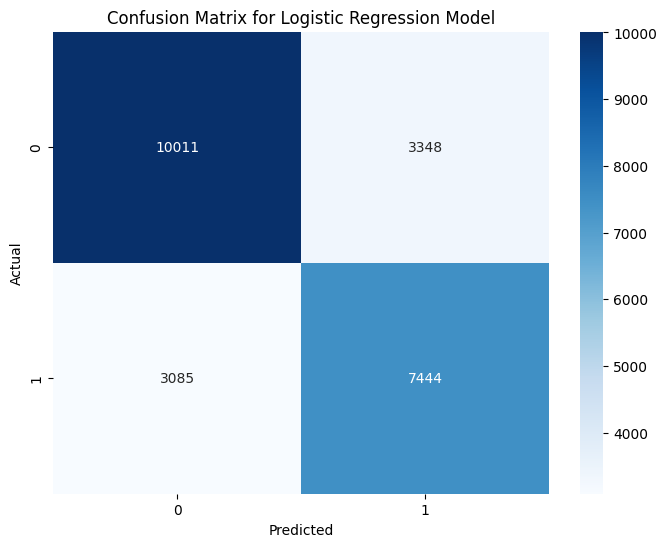

In [51]:
# Generate the confusion matrix
conf_matrix_logistic = confusion_matrix(y_valid, y_valid_pred_logistic)
print("Confusion Matrix for Logistic Regression Model:")
print(conf_matrix_logistic)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


In [52]:
# Bagging
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_valid_pred_bagging = bagging_model.predict(X_valid)
valid_accuracy_bagging = accuracy_score(y_valid, y_valid_pred_bagging)
print(f'Bagging Validation Accuracy: {valid_accuracy_bagging}')
print(classification_report(y_valid, y_valid_pred_bagging))


Bagging Validation Accuracy: 0.7475301406563966
              precision    recall  f1-score   support

           0       0.81      0.72      0.76     13359
           1       0.69      0.78      0.73     10529

    accuracy                           0.75     23888
   macro avg       0.75      0.75      0.75     23888
weighted avg       0.75      0.75      0.75     23888



In [53]:
# Boosting
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_valid_pred_boosting = boosting_model.predict(X_valid)
valid_accuracy_boosting = accuracy_score(y_valid, y_valid_pred_boosting)
print(f'Boosting Validation Accuracy: {valid_accuracy_boosting}')
print(classification_report(y_valid, y_valid_pred_boosting))

Boosting Validation Accuracy: 0.7553583389149364
              precision    recall  f1-score   support

           0       0.83      0.71      0.76     13359
           1       0.69      0.81      0.75     10529

    accuracy                           0.76     23888
   macro avg       0.76      0.76      0.76     23888
weighted avg       0.77      0.76      0.76     23888



In [54]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_valid_pred_rf = rf_model.predict(X_valid)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print(f'Random Forest Validation Accuracy: {valid_accuracy_rf}')
print(classification_report(y_valid, y_valid_pred_rf))

Random Forest Validation Accuracy: 0.7510046885465506
              precision    recall  f1-score   support

           0       0.82      0.72      0.76     13359
           1       0.69      0.79      0.74     10529

    accuracy                           0.75     23888
   macro avg       0.75      0.76      0.75     23888
weighted avg       0.76      0.75      0.75     23888



In [55]:
# Base model
model = RandomForestClassifier(random_state=42)

In [56]:
# Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)

grid_predictions = grid_search.best_estimator_.predict(X_test)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters from Grid Search: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Grid Search Accuracy: 0.752145338858889


In [57]:
from scipy.stats import randint

# Parameter distributions for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=100, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from Randomized Search:", random_search.best_params_)

random_predictions = random_search.best_estimator_.predict(X_test)
print("Randomized Search Accuracy:", accuracy_score(y_test, random_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters from Randomized Search: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 103}
Randomized Search Accuracy: 0.7529406839968186


Confusion Matrix for Random Forest Model:
[[9572 3787]
 [2161 8368]]


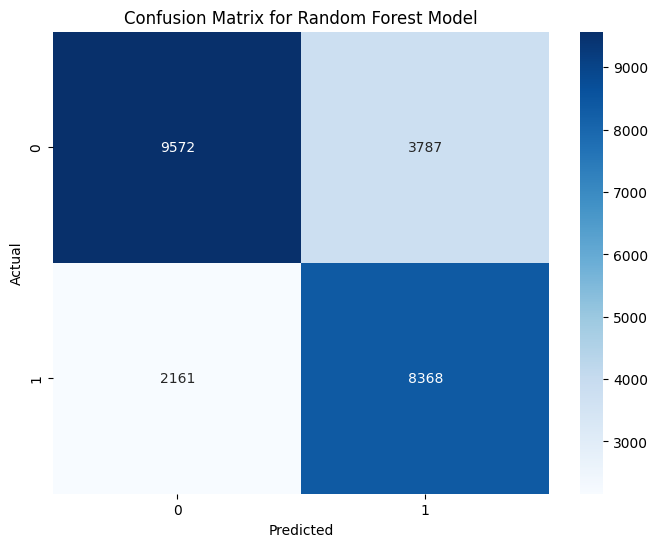

In [58]:
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation set
y_valid_pred_rf = rf_model.predict(X_valid)

# Create the confusion matrix
conf_matrix_rf = confusion_matrix(y_valid, y_valid_pred_rf)

# Display the confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(conf_matrix_rf)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [59]:
# Base model
model = GradientBoostingClassifier(random_state=42)

In [60]:
# Simplified Parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters from Grid Search:", grid_search.best_params_)

grid_predictions = grid_search.best_estimator_.predict(X_test)
print("Grid Search Accuracy:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Grid Search Accuracy: 0.7568336891456319


In [61]:
# Parameter distributions for Randomized Search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Randomized Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=20, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("Best parameters from Randomized Search:", random_search.best_params_)

random_predictions = random_search.best_estimator_.predict(X_test)
print("Randomized Search Accuracy:", accuracy_score(y_test, random_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters from Randomized Search: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 181, 'subsample': 0.6}
Randomized Search Accuracy: 0.7549499769768513


Confusion Matrix for Gradient Boosting Model:
[[9468 3891]
 [1953 8576]]


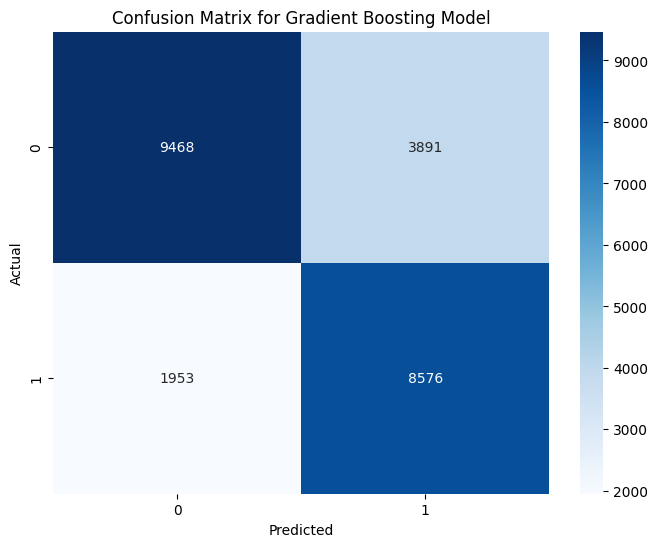

In [62]:
from sklearn.metrics import confusion_matrix

# Generate predictions for the validation set
y_valid_pred_boosting = boosting_model.predict(X_valid)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred_boosting)

# Display the confusion matrix
print("Confusion Matrix for Gradient Boosting Model:")
print(conf_matrix)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

Random Forest Validation Accuracy: 0.7511302746148694
              precision    recall  f1-score   support

           0       0.82      0.71      0.76     13359
           1       0.69      0.80      0.74     10529

    accuracy                           0.75     23888
   macro avg       0.75      0.76      0.75     23888
weighted avg       0.76      0.75      0.75     23888

Confusion Matrix for Random Forest Model:
[[9544 3815]
 [2130 8399]]


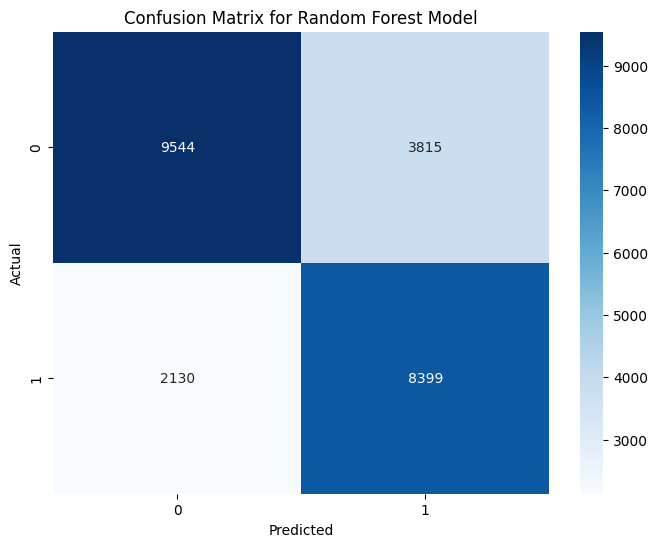

In [63]:
# Drop the specified columns
data = data.drop(columns=['hearing(left)', 'hearing(right)', 'Urine protein'])

# Preprocess the data
X = data.drop(columns=['smoking'])
y = data['smoking']

# Handle categorical variables if any
X = pd.get_dummies(X)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train the model again (using RandomForest as an example)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_valid_pred_rf = rf_model.predict(X_valid_scaled)
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
print(f'Random Forest Validation Accuracy: {valid_accuracy_rf}')
print(classification_report(y_valid, y_valid_pred_rf))

# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_valid, y_valid_pred_rf)
print("Confusion Matrix for Random Forest Model:")
print(conf_matrix_rf)

# Optionally, visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()